In [97]:
#@title Librerias
import numpy as np
import matplotlib.pyplot as plt
from math import factorial, sin, log
from sympy import binomial

# Actividad 03: Errores

### Profesor: Juan Marcos Marín Ramírez
#### Métodos Computacionales
---

# 1
La serie de Taylor para la función seno ($\sin(x)$) centrada en $a=0$ (también conocida como la serie de Maclaurin) se expresa de la siguiente manera:

> Añadir blockquote



$$\sin(x) = \sum_{n=0}^{\infty} \frac{(-1)^n}{(2n+1)!} x^{2n+1} = x - \frac{x^3}{3!} + \frac{x^5}{5!} - \frac{x^7}{7!} + \cdots$$

* Encontrar la aproximación para $x = \pi/4$ cambiando el valor de tolerancia, ¿Qué puede concluir de la serie?
* Hallar el error relativo y porcentual.
* Grafique los valores asociados a la serie después de cada iteración.
* Repita para la serie:
$$\ln(1+x) = \sum_{n=1}^{\infty} \frac{(-1)^{n-1}}{n} x^n$$

# Aproximacion para sen(x)


In [41]:
def taylor_sen(x,tol):
  suma = 0
  n = 0
  valor_sen = [] # Lista para almacenar los valores de pi
  while True:
    termino = (((-1)**n)/(2*n+1))*(x**(2*n+1)) # Calcula el término de la serie
    suma += termino  # Actualiza la suma
    valor_sen.append(suma)  # Actualiza la suma
    if abs(termino/suma) < tol:  # Verifica si el término es menor que la tolerancia
      break
    n += 1 # Si no se cumple la tolerancia, incrementa el contador continuando al siguiente término
  return suma,n,valor_sen



In [42]:
for tol in [1e-3, 1e-5,1e-8,1e-10,1e-12,1e-15]:
    sen,terminos,valores = taylor_sen(pi/4,tol)
    print(f'El valor de seno es {sen},obtenidos con {terminos} terminos para una tolerancia de {tol}')

El valor de seno es 0.6655827192124576,obtenidos con 9 terminos para una tolerancia de 0.001
El valor de seno es 0.6657715102929481,obtenidos con 17 terminos para una tolerancia de 1e-05
El valor de seno es 0.6657737524708809,obtenidos con 30 terminos para una tolerancia de 1e-08
El valor de seno es 0.6657737500038537,obtenidos con 39 terminos para una tolerancia de 1e-10
El valor de seno es 0.6657737500281978,obtenidos con 49 terminos para una tolerancia de 1e-12
El valor de seno es 0.6657737500283545,obtenidos con 62 terminos para una tolerancia de 1e-15


Por cada 2 ordenes de magnitud menos se suman aproximadamente 10 terminos mas, a menor precision se necesitan mayor cantidad de terminos, sin embargo a partir de una tolerancia de 1e-10 el valor de seno no cambia significatvamente, por lo que no aporta mucho el seguir sumando

In [43]:
valor_real = sin(pi/4)
aproximacion,terminos,valores = taylor_sen(pi/4,tol=1e-10)
error_absoluto = abs(valor_real - aproximacion)
error_relativo = (error_absoluto / valor_real)
error_porcentual = (error_absoluto / valor_real) * 100

print(f'el error relativo es {error_relativo: .4g}')
print(f'el error porcentual es de {error_porcentual: .4g} %')

el error relativo es  0.05845
el error porcentual es de  5.845 %


<ipython-input-44-c4ae11b3a256>:5: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


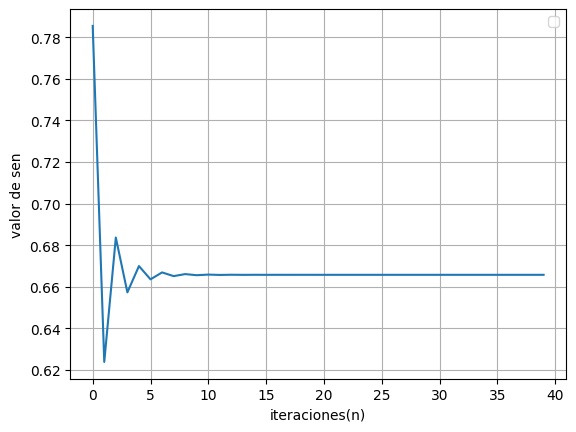

In [44]:
aproximacion, terminos, valores = taylor_sen(pi/4,tol=1e-10)
plt.plot(range(terminos+1),valores,)
plt.xlabel('iteraciones(n)')
plt.ylabel('valor de sen')
plt.legend()
plt.grid()
plt.show()

# Aproximacion para Ln(1+x)
$$\ln(1+x) = \sum_{n=1}^{\infty} \frac{(-1)^{n-1}}{n} x^n$$

In [115]:
def taylor_ln(x,tol):
  suma = 0
  n = 1
  valor_ln = []
  while True:
    termino = (((-1)**(n-1))/(n))*(x**n)
    suma += termino
    valor_ln.append(suma)
    if abs(termino/suma) < tol:
      break
    n += 1
  return suma,n,valor_ln

In [117]:
for tol in [1e-3, 1e-5,1e-8,1e-10,1e-12,1e-15]:
    ln,terminos,valores = taylor_ln(pi/4,tol)
    print(f'El valor de ln(1+x) es {ln},obtenidos con {terminos} terminos para una tolerancia de {tol}')

El valor de ln(1+x) es 0.5798697029336676,obtenidos con 19 terminos para una tolerancia de 0.001
El valor de ln(1+x) es 0.5796394396610138,obtenidos con 36 terminos para una tolerancia de 1e-05
El valor de ln(1+x) es 0.5796414488832067,obtenidos con 62 terminos para una tolerancia de 1e-08
El valor de ln(1+x) es 0.579641451062018,obtenidos con 80 terminos para una tolerancia de 1e-10
El valor de ln(1+x) es 0.5796414510838853,obtenidos con 98 terminos para una tolerancia de 1e-12
El valor de ln(1+x) es 0.5796414510841186,obtenidos con 126 terminos para una tolerancia de 1e-15


Esta aproximacion requiere muchisimo computacionalmente, en comparacion al trabajo con el seno, para una tol = 1e-10 se utiliza el doble de terminos n para alcanzar la precision dada e igualmente a partir de este valor s toma cierta estabilidad y no apota mucho seguir aumentando terminos.

In [63]:
valor_real = log((pi/4)+1)
aproximacion,terminos,valores = taylor_ln(pi/4,tol=1e-10)
error_absoluto = abs(valor_real - aproximacion)
error_relativo = (error_absoluto / valor_real)
error_porcentual = (error_absoluto / valor_real) * 100

print(f'el error relativo es {error_relativo: .4g}')
print(f'el error porcentual es de {error_porcentual: .4g} %')

el error relativo es  3.813e-11
el error porcentual es de  3.813e-09 %


<ipython-input-65-65e3c80c2176>:4: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


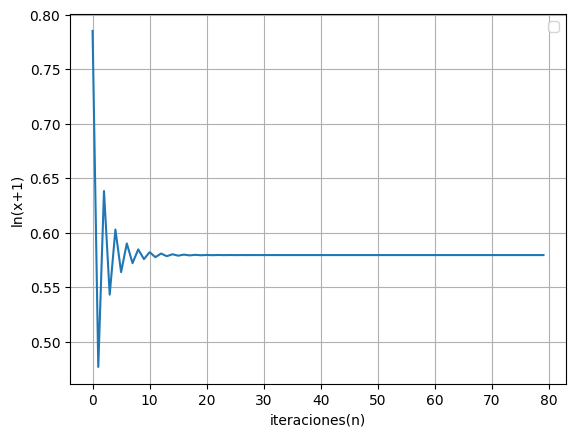

In [65]:
plt.plot(range(terminos),valores)
plt.xlabel('iteraciones(n)')
plt.ylabel('ln(x+1)')
plt.legend()
plt.grid()
plt.show()

# 2

La serie de Taylor para la función $(1+x)^\alpha$, conocida como la **serie binomial**, centrada en $a=0$ está dada por:

$$(1+x)^\alpha = \sum_{n=0}^{\infty} \binom{\alpha}{n} x^n = 1 + \alpha x + \frac{\alpha(\alpha-1)}{2!} x^2 + \frac{\alpha(\alpha-1)(\alpha-2)}{3!} x^3 + \cdots$$

donde $\binom{\alpha}{n}$ es el coeficiente binomial generalizado.

Considere el caso donde $\alpha = 1/2$, lo que nos da la serie de Taylor para $\sqrt{1+x}$:

$$\sqrt{1+x} = \sum_{n=0}^{\infty} \binom{1/2}{n} x^n = 1 + \frac{1}{2} x - \frac{1}{8} x^2 + \frac{1}{16} x^3 - \frac{5}{128} x^4 + \cdots$$

a.  **Encontrar la aproximación para $x = 0.5$** cambiando el número de términos incluidos en la suma. ¿Qué puedes concluir sobre la convergencia de la serie para este valor de $x$?

b.  **Hallar el error relativo y porcentual** para cada aproximación, utilizando el valor real de $\sqrt{1+0.5} = \sqrt{1.5} \approx 1.224744871$.


c.  **Grafique los valores asociados a la serie después de cada iteración.** Muestra cómo la serie se acerca al valor real a medida que se incluyen más términos.

d. **Utilizando el criterio de tolerancia, evalue 6 a 7 valores diferentes**, y encuentre cuántos términos son necesarios para alcanzar dicha resolución. Realice un gráfico de la evolución del sistema.



In [93]:
def raiz1_x(x,n):
  suma = 0
  valor_raiz = []
  for i in range(n+1):
    termino = (binomial(0.5, i))*(x**i)
    suma += termino
    valor_raiz.append(suma)
  return suma, valor_raiz

In [107]:
term = [1,2,5,10,20,50,100]
for i in term:
  raiz,valores = raiz1_x(0.5,i)
  valor_real = 1.224744871
  aproximacion = raiz
  error_absoluto = abs(valor_real - aproximacion)
  error_relativo = (error_absoluto / valor_real)
  error_porcentual = (error_absoluto / valor_real) * 100

  print(f'el valor de sqrt(1+x) para {i} terminos es: {raiz} con error relativo: {error_relativo: .4g} y error porcentual: {error_porcentual: .4g} %')

el valor de sqrt(1+x) para 1 terminos es: 1.25000000000000 con error relativo:  0.02062 y error porcentual:  2.062 %
el valor de sqrt(1+x) para 2 terminos es: 1.21875000000000 con error relativo:  0.004895 y error porcentual:  0.4895 %
el valor de sqrt(1+x) para 5 terminos es: 1.22497558593750 con error relativo:  0.0001884 y error porcentual:  0.01884 %
el valor de sqrt(1+x) para 10 terminos es: 1.22474214807153 con error relativo:  0.000002223 y error porcentual:  0.0002223 %
el valor de sqrt(1+x) para 20 terminos es: 1.22474487042029 con error relativo:  4.733e-10 y error porcentual:  4.733e-8 %
el valor de sqrt(1+x) para 50 terminos es: 1.22474487139159 con error relativo:  3.197e-10 y error porcentual:  3.197e-8 %
el valor de sqrt(1+x) para 100 terminos es: 1.22474487139159 con error relativo:  3.197e-10 y error porcentual:  3.197e-8 %


Esta serie tiene una convergencia muy rapida, con apenas 10 terminos ya hay coincidencia en 5 terminos despues del punto y un error de practicamente cero, facilmente se alcanza el valor de la raiz.

<ipython-input-114-dfa95a3b49b3>:5: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


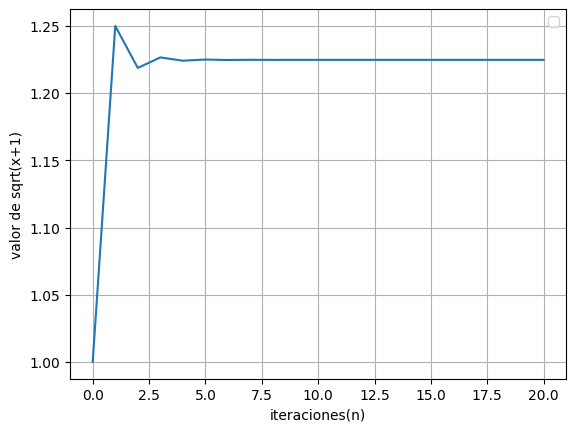

In [114]:
raiz,valores = raiz1_x(0.5,20)
plt.plot(range(n+1), valores)
plt.xlabel('iteraciones(n)')
plt.ylabel('valor de sqrt(x+1)')
plt.legend()
plt.grid()
plt.show()

In [119]:
def raiz1_x2(x,tol):
  suma = 0
  n = 0
  valor_raiz2 = []
  while True:
    termino = (binomial(0.5, i))*(x**i)
    suma += termino
    valor_raiz2.append(suma)
    if abs(termino/suma) < tol:
      break
    n += 1
  return suma,n,valor_raiz2

In [130]:
for tol in [1e-1, 1e-2,1e-3,1e-4,1e-5,1e-6]:
    raiz2,terminos,valores = raiz1_x2(0.5,tol)
    print(f'El valor de rqst(1+x) es {raiz2},obtenidos con {terminos} terminos para una tolerancia de {tol}')

El valor de rqst(1+x) es -2.45709665200885E-33,obtenidos con 10 terminos para una tolerancia de 0.1
El valor de rqst(1+x) es -2.23372422909896E-32,obtenidos con 99 terminos para una tolerancia de 0.01
El valor de rqst(1+x) es -2.23595795332804E-31,obtenidos con 1000 terminos para una tolerancia de 0.001
El valor de rqst(1+x) es -2.23372422909926E-30,obtenidos con 9999 terminos para una tolerancia de 0.0001
El valor de rqst(1+x) es -2.23374656633960E-29,obtenidos con 100000 terminos para una tolerancia de 1e-05
El valor de rqst(1+x) es -2.23372646280614E-28,obtenidos con 1000000 terminos para una tolerancia de 1e-06


<ipython-input-131-8ebe03b2465b>:10: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


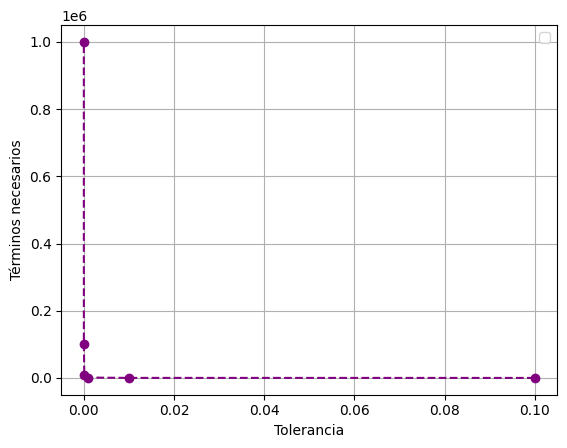

In [131]:
tolerancias = [1e-1, 1e-2, 1e-3, 1e-4, 1e-5, 1e-6]
terminos_necesarios = []
for tol in tolerancias:
    _, n_terminos, _ = raiz1_x2(0.5, tol)
    terminos_necesarios.append(n_terminos)

plt.plot(tolerancias, terminos_necesarios, marker='o', linestyle='--', color='purple')
plt.xlabel('Tolerancia')
plt.ylabel('Términos necesarios')
plt.legend()
plt.grid()
plt.show()